In [2]:
# load the libraries for versioning

from __future__ import print_function, division
from future.utils import iteritems
from builtins import range

In [3]:
# import main libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

In [6]:
# make sure the data is available
import os 

os.getcwd()

os.listdir()


['Spam2.ipynb', '.ipynb_checkpoints', 'spam.csv']

In [9]:
# load in the data
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [10]:
# drop unnecessary columns
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)

In [12]:
# change the column names
df.columns = ['labels', 'data']
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# change the labels to a binary classification
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].as_matrix()

In [42]:
# for tfidf use the following
tfidf = TfidfVectorizer(decode_error='ignore')
X = tfidf.fit_transform(df['data']).toarray()

# use count vectorizer to count 
# count_vectorizer = CountVectorizer(decode_error = 'ignore')
# X = count_vectorizer.fit_transform(df['data'])


In [43]:
# split for testing and training

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.33, random_state = 0)

# Applying k-Fold Cross Validation
# from sklearn.model_selection import cross_val_score
# accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs = 1)
# accuracies.mean()
# accuracies.std()

In [51]:
# create the model
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print('train score: ', model.score(Xtrain, Ytrain))
print('test score: ', model.score(Xtest, Ytest))

train score:  0.965979105277
test score:  0.941816204459


In [44]:
# alternate model naive bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, Ytrain)
print('train score: ', model.score(Xtrain, Ytrain))
print('test score: ', model.score(Xtest, Ytest))

train score:  0.958210554514
test score:  0.908102229473


In [53]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X = Xtrain, y = Ytrain, cv = 10, n_jobs = 1)
accuracies.mean()
accuracies.std()
print(accuracies)
print('cv mean: ', accuracies.mean())
print('cv std: ', accuracies.std())

[ 0.93850267  0.95187166  0.94919786  0.96256684  0.94919786  0.95721925
  0.9463807   0.94892473  0.96236559  0.95698925]
cv mean:  0.952321641668
cv std:  0.0071353656731


In [58]:
# create a visualization function with wordcloud

def visualize(label):
    words = ''
    for msg in df[df['labels'] == label]['data']:
        # make them all lower case
        msg = msg.lower()
        # concatenate and add a space
        words += msg + ''
    wordcloud = WordCloud(width=1200, height=800).generate(words)
    plt.figure(figsize  = (12,8))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    

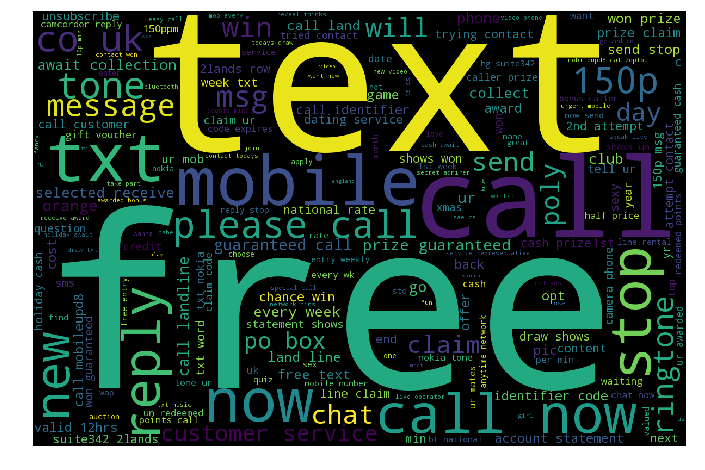

In [59]:
visualize('spam')

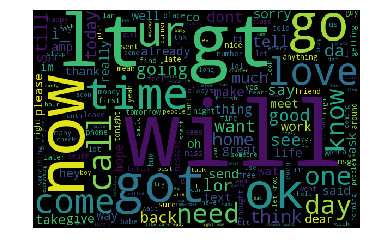

In [26]:
visualize('ham')

In [29]:
# see what is going wrong
df['predictions'] = model.predict(X)

In [30]:
# things that should be spam
sneaky_spam = df[(df['predictions'] == 0) & (df['b_labels'] == 1)]['data']
for msg in sneaky_spam:
  print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
How about getting in touch with folks waiting for company? Just txt back your NAME and AGE to opt in! Enjoy the community (150p/SMS)
Can U get 2 phone NOW? I wanna chat 2 set up meet Call me NOW on 09096102316 U can cum here 2moro Luv JANE xx Callså£1/minmoremobsEMSPOBox45PO139WA
CLAIRE here am havin borin time & am now alone U wanna cum over 2nite? Chat now 09099725823 hope 2 C U Luv CLAIRE xx Callså£1/minmoremobsEMSPOBox45PO139WA
Would you like to see my XXX pics they are so hot they were nearly banned in the uk!
More people

In [31]:
# things that should not be spam
not_actually_spam = df[(df['predictions'] == 1) & (df['b_labels'] == 0)]['data']
for msg in not_actually_spam:
  print(msg)

\Hello-/@drivby-:0quit edrunk sorry iff pthis makes no senrd-dnot no how ^ dancce 2 drum n basq!ihave fun 2nhite x ros xxxxxxx\""
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
Hey...Great deal...Farm tour 9am to 5pm $95/pax, $50 deposit by 16 May
Yalru lyfu astne chikku.. Bt innu mundhe lyf ali halla ke bilo (marriage)program edhae, so lyf is nt yet ovr chikku..ali vargu lyfu meow meow:-D
Total video converter free download type this in google search:)
S..antha num corrct dane
Yavnt tried yet and never played original either
\Si.como no?!listened2the plaid album-quite gd&the new air1 which is hilarious-also boughtåÓbraindanceåÓa comp.ofstuff on aphexåÕs ;abel
Hmm...Bad news...Hype park plaza $700 studio taken...Only left 2 bedrm-$900...
Tiwary to rcb.battle between bang and kochi.
\NONE!NOWHERE IKNO DOESDISCOUNT!SHITINNIT\""
Ee msg na poortiyagi odalebeku: Hanumanji 7 name 1-Hanuman 2-Bajarangabali 3-Maruti 4-Pavanaputra 5-Sankatmocha

In [33]:
# check the results with a confusion matrix
# predicting the test set results
y_pred = model.predict(Xtest)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Ytest, y_pred)
cm

array([[1560,   18],
       [  15,  246]])